![Astrofisica Computacional](../logo.PNG)

---
## 50. Ecuación de Advección Multidimensional

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se obtiene la solución de la ecuación de advección multidimensional por el método de volumenes finitos


---

---

## Ecuación Lineal de Advección 2-Dimensional

La ecuación lineal de advección en 2-dimensiones para la función $a=a(t,x,y)$ es

\begin{equation}
\partial_t a + u \partial_x a + v \partial_y a = 0
\end{equation}

donde $u$ es la velocidad de advección en direccion-x y $v$ es la velocidad en dirección-y . El promedio de la función$a(t,x,y)$ en la zona $i,j$ se denotará como $a_{i,j}$ y en general, el índice $i$ etiquetará la dirección-x mientras que el índice $j$ etiqueta la dirección-y. 

<center><img src="https://i.ibb.co/gMCg1gC/2Dgrid.png" alt="2Dgrid" width="600"></center>

---

### Método de Volumenes Finitos en 2-dimensiones

Ya que $u$ y $v$ se conisderarán como constantes, es posible colocarlas dentro de las derivadas parciales en la ecuación de advección,

\begin{equation}
\partial_t a + \partial_x (u a) + \partial_y (v a) = 0.
\end{equation}

Se define el promedio de la función $a$ en una zona al integras sobre el *volumen* 2-dimensional de uno de los intervalos,

\begin{equation}
a_{i,j} = \frac{1}{\Delta x \Delta y} 
   \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} 
   a(x,y,t) \, dx \, dy .
\end{equation}

De esta forma, al integrar la ecuación de advección con respecto a $x$ y a $y$, se obtiene

\begin{align}
\frac{1}{\Delta x \Delta y} 
  \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} 
  \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} \partial_t a \, dx \, dy =  
  &- \frac{1}{\Delta x \Delta y}
       \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
      \partial_x (u a) \, dx \, dy \nonumber \\
  &- \frac{1}{\Delta x \Delta y}
       \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
      \partial_y (v a) \, dx \, dy 
\end{align}

y al intercambiar la integral con el operador de derivada temporal al lado izquierdo e integrar adecuadamente los terminos del lado derecho se llega a

\begin{align}
 \frac{\partial a_{i,j}}{\partial t} =
  &- \frac{1}{\Delta x\Delta y} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
     \left \{ (u a)_{i+\frac{1}{2},j} - (u a)_{i-\frac{1}{2},j} \right \} dy \nonumber \\
  &- \frac{1}{\Delta x\Delta y} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}
     \left \{ (v a)_{i,j+\frac{1}{2}} - (v a)_{i,j-\frac{1}{2}} \right \} dx
\end{align}

Integración de esta ecuación entre los tiempos $t^n$ y $t^{n+1}$ da como resultado

\begin{align}
 a_{i,j}^{n+1} - a_{i,j}^n = 
  &- \frac{1}{\Delta x\Delta y} \int_{t^n}^{t^{n+1}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}}
     \left \{ (u a)_{i+\frac{1}{2},j} - (u a)_{i-\frac{1}{2},j} \right \} dy dt \nonumber \\
  &- \frac{1}{\Delta x\Delta y} \int_{t^n}^{t^{n+1}} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}
     \left \{ (v a)_{i,j+\frac{1}{2}} - (v a)_{i,j-\frac{1}{2}} \right \} dx dt .
\end{align}


Ahora bien, el flujo a través de una superficie de interfaz se define como el promedio sobre la superficie de esa cara y en el tiempo. Esto da como resultado las siguientes expresiones:

1. A través de una cara de x constante:
\begin{equation}
\langle (ua)_{i+\frac{1}{2},j}\rangle_{(t)} = \frac{1}{\Delta y \Delta t}
    \int_{t^n}^{t^{n+1}} \int_{y_{j-\frac{1}{2}}}^{y_{j+\frac{1}{2}}} (ua)_{i+\frac{1}{2},j}\, dy dt
\end{equation}

2. A través de una cara de y constante:
\begin{equation}
\langle (va)_{i,j+\frac{1}{2}}\rangle_{(t)} = \frac{1}{\Delta x \Delta t}
    \int_{t^n}^{t^{n+1}} \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}} (va)_{i,j+\frac{1}{2}}\, dx dt 
\end{equation}

donde $\langle . \rangle_{(t)}$ denotará el promedio temporal sobre esa cara.

Al igual que en el caso de la advección 1-dimensional, el promedio temporal se reemplaza por el flujo en el punto medio en el tiempo y ahora, también el promedio sobre la cara se reemplazará por el valor del flujo en el centro de la cara,

\begin{equation}
\langle (ua)_{i+\frac{1}{2},j} \rangle_{(t)} \approx (ua)_{i+\frac{1}{2},j}^{n+\frac{1}{2}}
\end{equation}

y por lo tanto,

\begin{equation}
a_{i,j}^{n+1} = a_{i,j}^n - \Delta t \left [
   \frac{(ua)_{i+\frac{1}{2},j}^{n+\frac{1}{2}} - (ua)_{i-\frac{1}{2},j}^{n+\frac{1}{2}}}{\Delta x} +
   \frac{(va)_{i,j+\frac{1}{2}}^{n+\frac{1}{2}} - (va)_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta y} \right ]
\end{equation} 



En este problea de advección lineal, en el que $u$ y $v$ son constantes, solo es necesario encontrar los valores de $a$ aen las interfaces, esto quiere decir $a^{n+1/2}_{i\pm 1/2 , j}$ en las interfaces-x y $a^{n+1/2}_{i, j \pm 1/2}$ en las interfaces-y. Existen dos métodos para calcular estos estados: **con división dimensional** y **sin división**. 

---
### Método de División Dimensional 

Los métodos con división dimensional son los más sencillos de implementar y tienen como base que cada una de las dimensiones se trabaja de forma independiente a las demás. Esto implica que se utilizará el método de solución 1-dimensional descrito en clases anteriores en cada una de las direcciones.

El método de Strang es un algoritmo de segundo orden de precisión en el tiempo en el cual se alterna el orden de actualización dimensional en cada paso temporal. De esta forma, cada actualización temporal en un $\Delta t$ consiste en una actualización en $x$ seguida de una actualización en $y$,

\begin{eqnarray}
a_{i,j}^\star &=& a_{i,j}^n 
  - \Delta t \frac{ u a_{i+\frac{1}{2},j}^{n+\frac{1}{2}} - u a_{i-\frac{1}{2},j}^{n+\frac{1}{2}} }{\Delta x}\\
a_{i,j}^{n+1} &=&  a_{i,j}^\star
  - \Delta t \frac{ v a_{i,j+\frac{1}{2}}^{\star,n+\frac{1}{2}} - v a_{i,j-\frac{1}{2}}^{\star,n+\frac{1}{2}} }{\Delta y}
\end{eqnarray}

Para construir los estados en las interfaces se sigue el mismo porceso descrito para la ecuación de advección 1-dimensional, i.e. considerando las expansiones desde la izquierda o desde la derecha y resolviendo el problema de Riemann correspondiente.


<center><img src="https://i.ibb.co/M7WPb8c/Gaussian.jpg" alt="Gaussian" width="600"></center>

<center><img src="https://i.ibb.co/xzfz4g8/Gaussian2.jpg" alt="Gaussian2" width="600"></center>


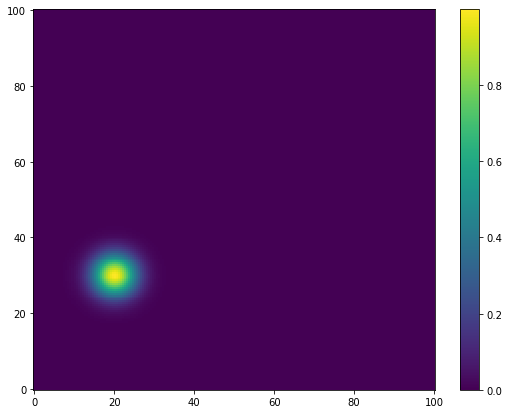

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# 2D-Gaussian Profile
def gaussian2D(x, y, x0=20., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


# Initial data for the Gaussian profile
x0 = 20.
y0 = 30.



# 2-D grid
n = 200
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])

# Build the profile
for i in range(n):
    zrange[i,:] = gaussian2D(xrange[i], yrange, x0, y0) 

# Make the plot with colorbar
plt.figure(figsize=(9,7))
plt.pcolormesh(xrange, yrange, zrange.T, shading='auto') 
# Note the transposition of the zrange array included to obtain 
# the x component in the horizontal axis
plt.colorbar()
plt.show()
 

dx = 0.33444816053511706
dy = 0.33444816053511706
C_{CFL} = 0.5
dt = 0.5574136008918618


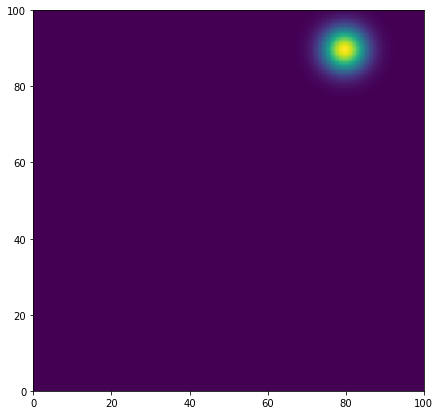

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline


# 2D-Gaussian Profile
def gaussian2D(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


def der(a, ds):
    '''First derivative da/ds'''
    dads = np.zeros(len(a))
    # Boundary points (lateral derivative)
    dads[0] = (a[1] - a[0])/(2*ds)
    dads[-1] = (a[-1] - a[-2])/(2*ds)
    # Inner points (Centered derivative)
    for i in range(1,len(a)-1):
        dads[i] = (a[i+1] - a[i-1])/(2*ds)
    return dads

def F(a,vel):
    '''Definition of the Flux of quantity a, moving with velocity vel'''
    return vel*a 

# Riemann Problem
def R(a,v,ds,dt):
    '''Solution of the Riemann problem'''
    dads = der(a,ds)
    a_halftime = np.zeros(len(a))
    if v>0:
        for i in range(len(a)):
            a_halftime[i] = a[i] + (ds/2.)*(1-(dt/ds)*v)*dads[i]
    else:
        for i in range(len(a)-2, -1, -1):
            a_halftime[i] = a[i+1] - (ds/2.)*(1+(dt/ds)*v)*dads[i+1]
    return a_halftime
        

# Finite-Volume Method
def FV(a,v,ds,dt):
    anew = np.zeros(len(a)) 
    Ra = R(a,v,ds,dt)
    Fa = F(Ra,v)
    for j in range(1,len(a)):
        anew[j] = a[j] - (dt/ds)*(Fa[j] - Fa[j-1])
        
    # Outflow boundary conditions
    if v>0:
        anew[0] = a[0]
    else:
        anew[-1] = a[-1]
    return anew





# Initial data for the Gaussian profile
x0 = 20.
y0 = 30.

# 2-D spatial grid
n = 300
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])

dx = xrange[1] - xrange[0]
dy = yrange[1] - yrange[0]

# Build the Initial profile
for i in range(n):
    zrange[i,:] = gaussian2D(xrange[i], yrange, x0, y0) 


# Velocity of the advection
vx = 0.3
vy = 0.3

# CFL Coefficient
C = 0.5

# Temporal grid
t_i = 0.
t_f = 200.
dt = C*dx/abs(vx)
tgrid = np.arange(t_i, t_f, dt)

print('dx =', dx)
print('dy =', dy)
print('C_{CFL} =', C)
print('dt =', dt)


# Animation Inizialization
fig = plt.figure(figsize=(7,7))
ims = []

# Main Loop
zstar = np.zeros([n,n])
znew = np.zeros([n,n])
for k in range(1,len(tgrid)):
    for j in range(len(yrange)):
        zstar[:,j] = FV(zrange[:,j],vx,dx,dt)
    for i in range(len(xrange)):
        znew[i,:] = FV(zstar[i,:],vy,dy,dt)
    zrange = znew
    im = plt.pcolormesh(xrange, yrange, zrange[1:,1:].T,shading='auto')
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


HTML(ani.to_jshtml())

dx = 0.33444816053511706
C_{CFL} = 0.9
dt = 3.0100334448160537


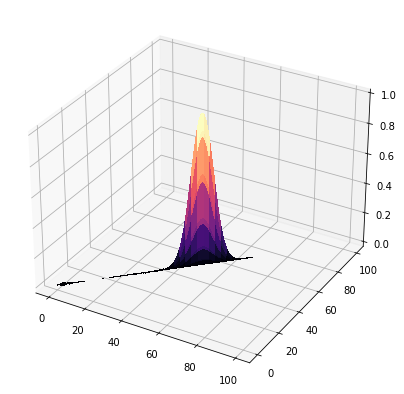

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline


# 2D-Gaussian Profile
def gaussian2D(x,y, x0=30., y0=30.):
    sigma2 = 15.
    return np.exp(-((x-x0)**2 + (y-y0)**2)/(2*sigma2))


def der(a, ds):
    '''First derivative da/ds'''
    dads = np.zeros(len(a))
    # Boundary points (lateral derivative)
    dads[0] = (a[1] - a[0])/(2*ds)
    dads[-1] = (a[-1] - a[-2])/(2*ds)
    # Inner points (Centered derivative)
    for i in range(1,len(a)-1):
        dads[i] = (a[i+1] - a[i-1])/(2*ds)
    return dads

def F(a,vel):
    '''Definition of the Flux of quantity a, moving with velocity vel'''
    return vel*a 

# Riemann Problem
def R(a,v,dx,dt):
    '''Solution of the Riemann problem'''
    dadx = der(a,dx)
    a_halftime = np.zeros(len(a))
    if v>0:
        for i in range(len(a)):
            a_halftime[i] = a[i] + (dx/2.)*(1-(dt/dx)*v)*dadx[i]
    else:
        for i in range(len(a)-2, -1, -1):
            a_halftime[i] = a[i+1] - (dx/2.)*(1+(dt/dx)*v)*dadx[i+1]
    return a_halftime
        

# Finite-Volume Method
def FV(a,v,dx,dt):
    anew = np.zeros(len(a)) 
    Ra = R(a,v,dx,dt)
    Fa = F(Ra,v)
    for j in range(1,len(a)):
        anew[j] = a[j] - (dt/dx)*(Fa[j] - Fa[j-1])
        
    # Outflow boundary conditions
    if v>0:
        anew[0] = a[0]
    else:
        anew[-1] = a[-1]
    return anew



# Initial data for the Gaussian profile
x0 = 20.
y0 = 30.

# 2-D spatial grid
n = 300
xrange = np.linspace(0,100,n)
yrange = np.linspace(0,100,n)
zrange = np.zeros([n,n])

dx = xrange[1] - xrange[0]
dy = yrange[1] - yrange[0]

# Build the Initial profile
for i in range(n):
    zrange[i,:] = gaussian2D(xrange[i], yrange, x0, y0) 



# Velocity of the advection
vx = 0.1
vy = 0.2

# CFL Coefficient
C = 0.9

# Temporal grid
t_i = 0.
t_f = 100.
dt = C*dx/abs(v)
tgrid = np.arange(t_i, t_f, dt)

print('dx =', dx)
print('C_{CFL} =', C)
print('dt =', dt)


# Animation Inizialization
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ims = []

# Main Loop
zstar = np.zeros([n,n])
znew = np.zeros([n,n])
for k in range(1,len(tgrid)):
    for j in range(len(yrange)):
        zstar[:,j] = FV(zrange[:,j],vx,dx,dt)
    for i in range(len(xrange)):
        znew[i,:] = FV(zstar[i,:],vy,dy,dt)
    zrange = znew
    im = ax.plot_surface(xrange, yrange, zrange, cmap=cm.magma, linewidth=0, antialiased=False)
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

HTML(ani.to_jshtml())